In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.figure(figsize=(20,20))


# Read image from path
# path = 'parda.jpg' 
path = '239056.jpg' 
# path = 'fruit-bowl.jpg' 
# path = 'kid.jpg' 
img = cv2.imread(path)

<Figure size 1440x1440 with 0 Axes>

# Just trying Canny Edge detection

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def simpleCannyEdge(path):
    plt.figure(figsize=(20,20))
    img = cv2.imread(path,0).astype(np.uint8)
#     img = cv2.GaussianBlur(img,(7,7),0)

    edges = cv2.Canny(img,100,200)

    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Simple Canny Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()

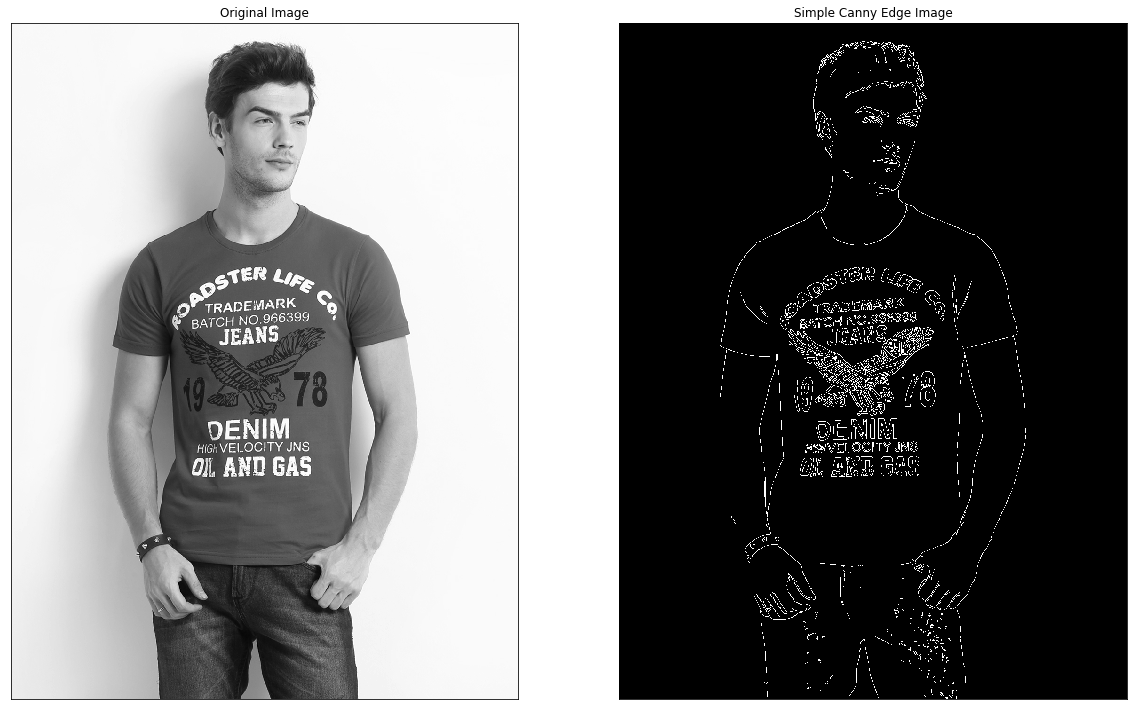

In [17]:
simpleCannyEdge('239056.jpg')

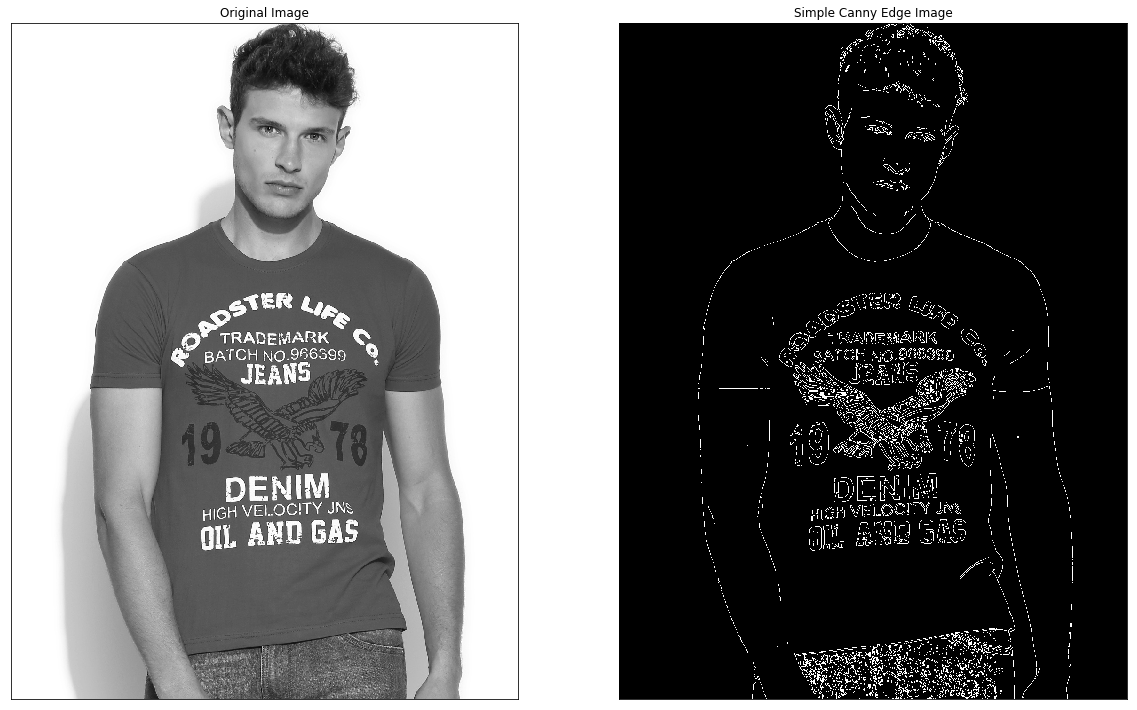

In [18]:
simpleCannyEdge('685810.jpg')

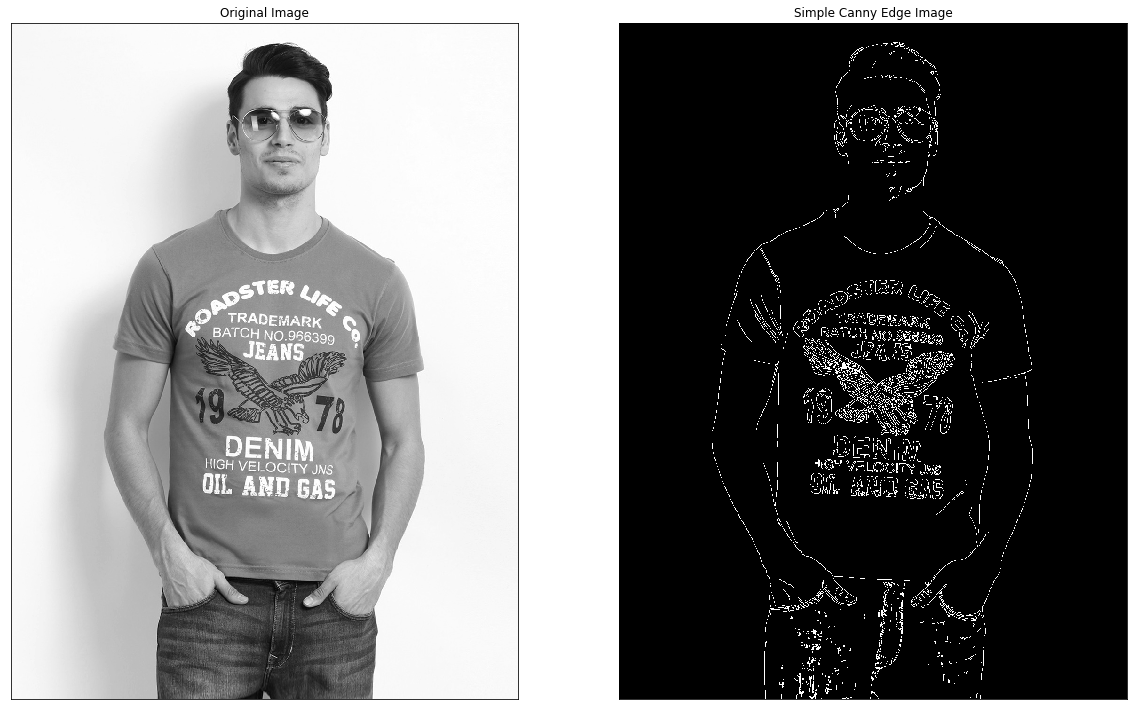

In [19]:
simpleCannyEdge('239041.jpg')

# Optimized pipeline for removing noise and filtering better contours
1. Convert an image to gray scale.
2. Perform gaussian blur on it.
3. Pass it through sobel filter.
4. Pass it through canny edge detector.

In [57]:
def plotBetter(path):
    plt.figure(figsize=(20,20))
    # Convert it to gray scale
    img_gray_mode = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(131),plt.imshow(img_gray_mode, cmap='gray'),plt.axis('off'),plt.title('Original Image')
    
    (thresh, im_bw) = cv2.threshold(img_gray_mode, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    thresh = 127
    img_bw = cv2.threshold(img_gray_mode, thresh, 255, cv2.THRESH_BINARY)[1]
    plt.subplot(132),plt.imshow(img_bw, cmap='gray'),plt.axis('off'),plt.title('B/W Image')


    # Do a gaussian blur using 7*7 filter
#     img_gaussian = cv2.GaussianBlur(img_gray_mode,(7,7),0)
    img_gaussian = cv2.GaussianBlur(img_bw,(7,7),0)
    # plt.subplot(132),plt.imshow(img_gaussian, cmap='gray'),plt.axis('off')


    # Find the sobel values
    import scipy
    from scipy import ndimage

    img_gaussian = img_gaussian.astype('int32')
    dx = ndimage.sobel(img_gaussian, 1)  # horizontal derivative
    dy = ndimage.sobel(img_gaussian, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.max(mag)  # normalize (Q&D)

    # Get the canny edge values
    mag_copy = np.uint8(mag)

    plt.subplot(133),plt.imshow(mag_copy, cmap='gray'),plt.axis('off'),plt.title('Enhanced Operated Image')

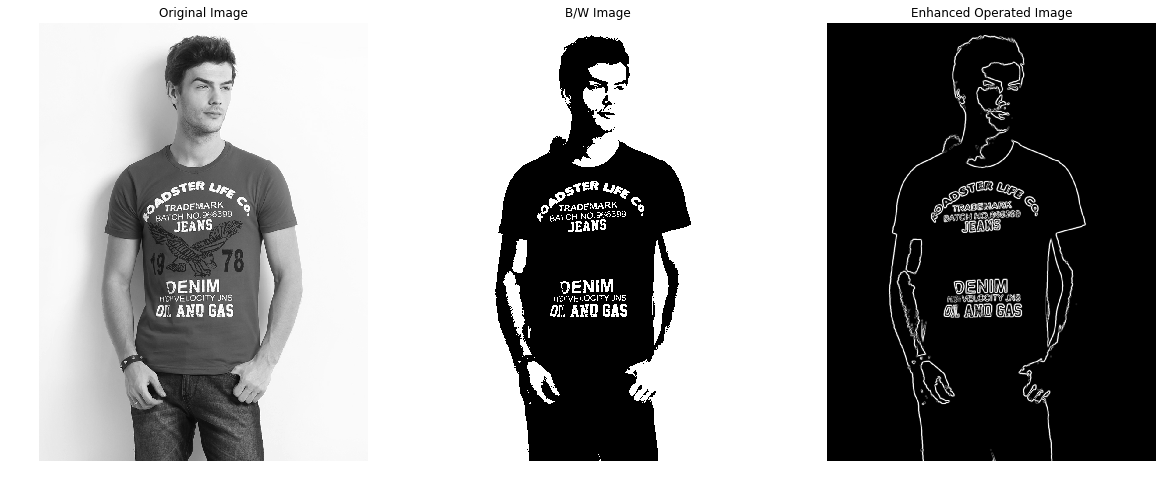

In [58]:
# plt.figure(figsize=(10,10))
# slicecanny = cv2.Canny(mag_copy,1,100)
# plt.imshow(slicecanny, cmap='gray'),plt.axis('off'),plt.title('Enhanced Canny Image')
plotBetter('239056.jpg')

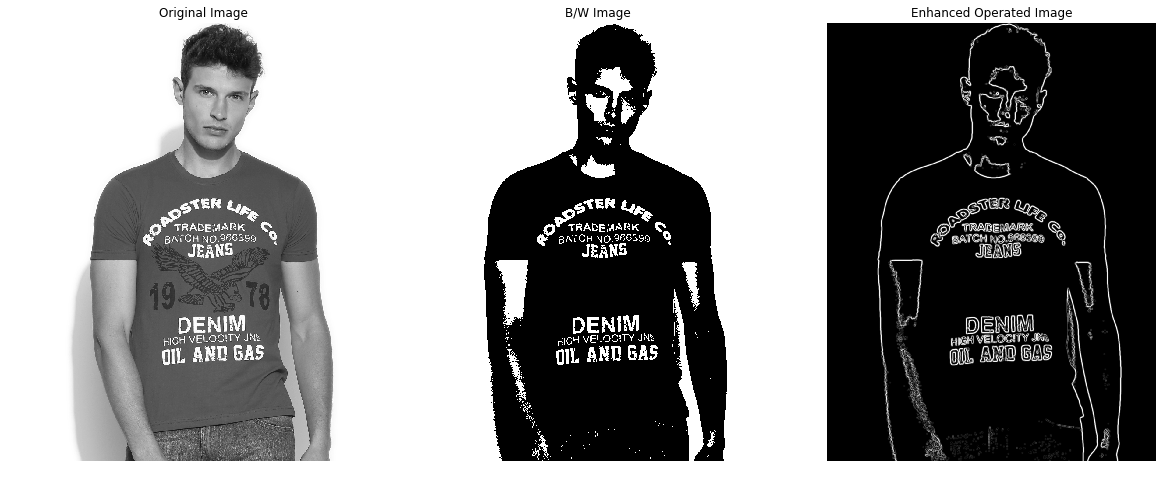

In [59]:
plotBetter('685810.jpg')

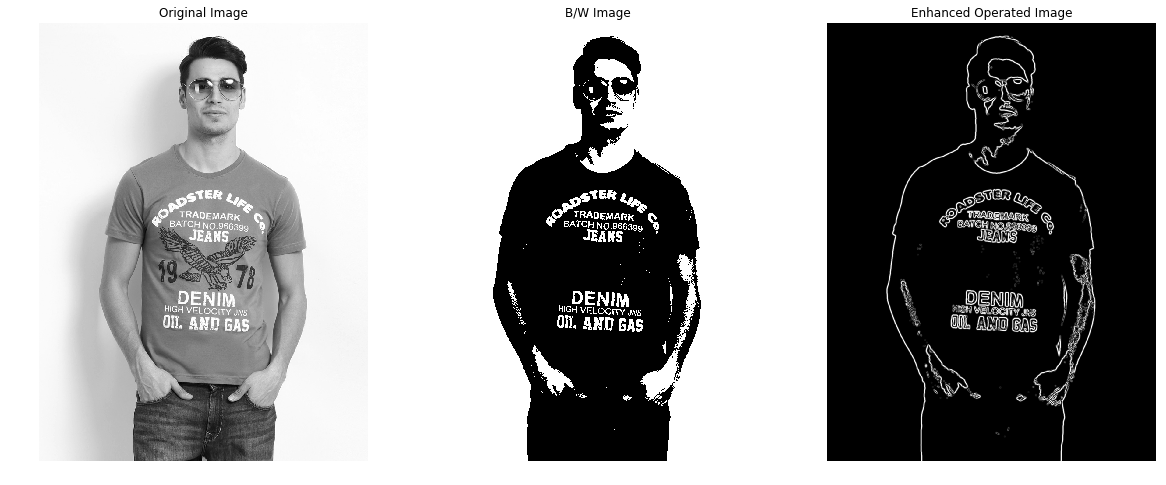

In [60]:
plotBetter('239041.jpg')

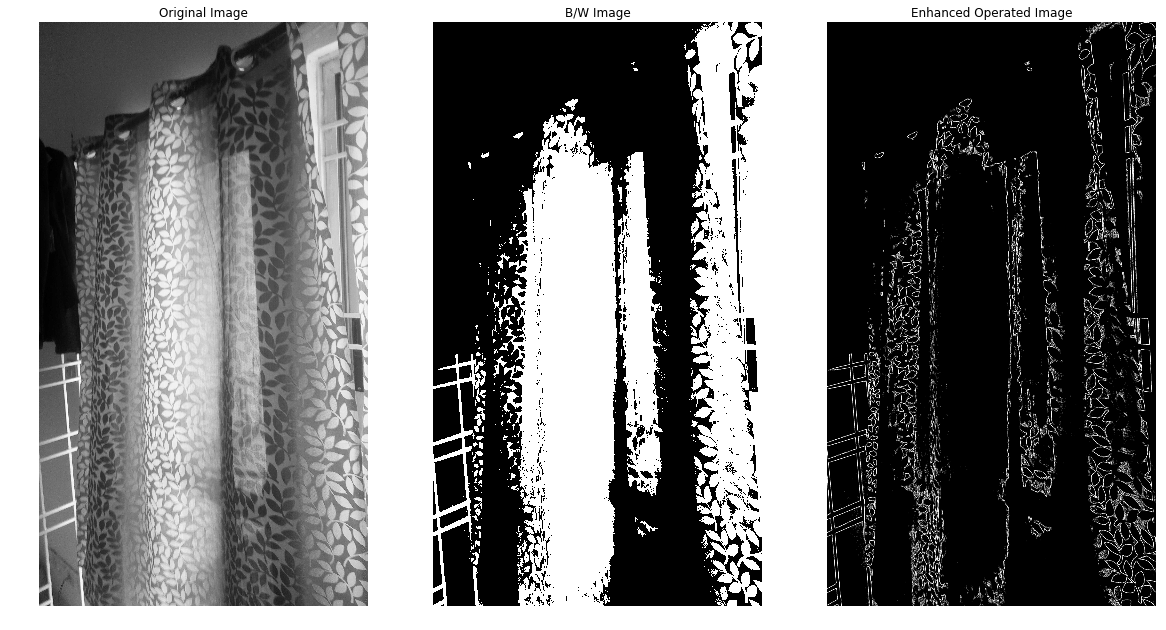

In [61]:
plotBetter('parda.jpg')